Importing required packages, libraries

In [10]:
import numpy as np
import pandas as pd
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pylab import plot, axis, show, pcolor, colorbar, bone

Importing and processing data

In [2]:
data = pd.read_csv('Credit_Card_Applications.csv')

In [3]:
data.head(10)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [4]:
data.shape

(690, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [6]:
X = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

Scaling x

In [7]:
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

Hyperparameters

In [12]:
sigma = 1
learningRate = 0.5

somGridRows = 10
somGridColumns = 10

iterations = 20000 

Defining SOM

In [13]:
som = MiniSom(x=somGridRows, y=somGridColumns,
              input_len=X.shape[1], sigma=sigma, learning_rate=learningRate)

Initial Random Weight Initialisation

In [14]:
som.random_weights_init(X)

Training

In [15]:
som.train_random(X, iterations)

Retrieving weights

In [16]:
wts = som.get_weights()

In [18]:
wts.shape

(10, 10, 14)

Distance map of weights

In [19]:
ditanceMap = som.distance_map()

Plotting the clusters

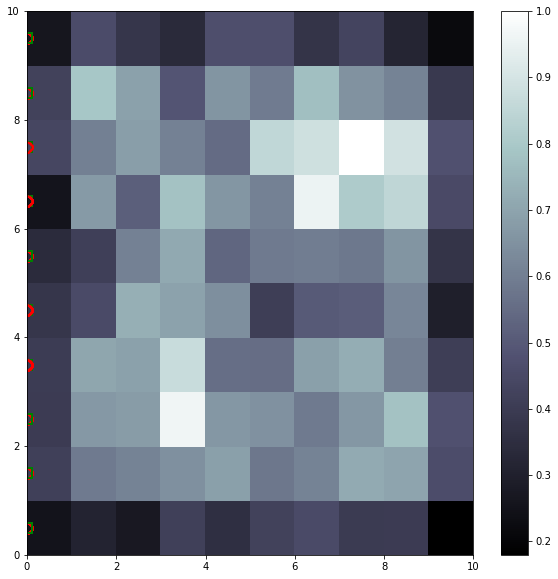

In [20]:
plt.figure(figsize = (10,10))
bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']

for i,x in enumerate(X):
    w = som.winner(x)
    
    plot(w[0] + 0.5, markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', markersize = 10, markeredgewidth = 2)
    
show()    

Finding out the fraud customers

In [21]:
mappings = som.win_map(X)

In [23]:
len(mappings.keys())

78

Blacklisting the fraud applications which have been greenlit

In [24]:
frauds = mappings[(4,2)]

In [25]:
frauds = sc.inverse_transform(frauds)

In [26]:
pd.DataFrame(frauds)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,52.33,1.375,1.0,8.0,8.0,9.460,1.0,0.0,0.0,1.0,2.0,200.0,101.0
1,1.0,42.50,4.915,1.0,9.0,4.0,3.165,1.0,0.0,0.0,1.0,2.0,52.0,1443.0
2,1.0,23.33,11.625,1.0,9.0,4.0,0.835,1.0,0.0,0.0,1.0,2.0,160.0,301.0
3,1.0,19.42,1.500,1.0,13.0,4.0,2.000,1.0,0.0,0.0,1.0,2.0,100.0,21.0
4,1.0,27.00,1.500,1.0,9.0,4.0,0.375,1.0,0.0,0.0,1.0,2.0,260.0,1066.0
5,1.0,37.50,1.750,1.0,8.0,5.0,0.250,1.0,0.0,0.0,1.0,2.0,164.0,401.0
6,1.0,32.67,9.000,1.0,9.0,8.0,5.250,1.0,0.0,0.0,1.0,2.0,154.0,1.0
7,1.0,32.00,1.750,1.0,10.0,8.0,0.040,1.0,0.0,0.0,1.0,2.0,393.0,1.0
8,1.0,28.75,1.500,1.0,8.0,4.0,1.500,1.0,0.0,0.0,1.0,2.0,0.0,226.0
